Hasta ahora he utilizado las herramientas de la api de alto nivel de Tensor Flow llamada Keras. Esta permite afrontar la gran mayoría de los problemas, pero a veces es necesario personalizar los flujos, acceder a las funciones de costo, métricas personalizadas, capas, modelos, inicializadores, regularizadores, reglas de pesos, también es plausible controlar el loop de entrenamiento, para aplicar transformaciones especiales a los gradientes o para usar distintos optimizadores según la parte de la red en que este la neurona.

# TensorFlow
Es una librería de computo desarrollada por Google, optimizada para Machine Learning siendo este su uso más popular.
- Su núcleo es similar a NumPy, pero provee GPU Support
- Soporta procesamiento distriuido (en diversos dispositivos)
- Incluye un compilador Just In Time que permite optimizar cálculos en velocidad y memoria. Funciona extrayendo el grafo computacional de una función de Python, optimizándolo y corriendolo de forma óptima. Para ello un ejemplo de optimización es hacer "prunning de este grafo" y paralelizando aquellas operaciones independientes
- Es multi ambiente y sus grafos se pueden exportar para usar en windows, linux o android
- Provee funciones de optimización, reverse mode-autodiff y muchas otras herramientas
- Provee carga y procesamiento de datos, imagenes, signal y más
- En alto nivel, cada operación de TensorFlow está implementada usando C++ de alta eficiencia. Cada operación tiene multiples implementaciones llamadas kernels, optimizadas para el dispositivo o GPU que se requiera. Las GPUs optimizan los cálculos paralelizandólos en smaller chunks y corriendólos en varios hilos.

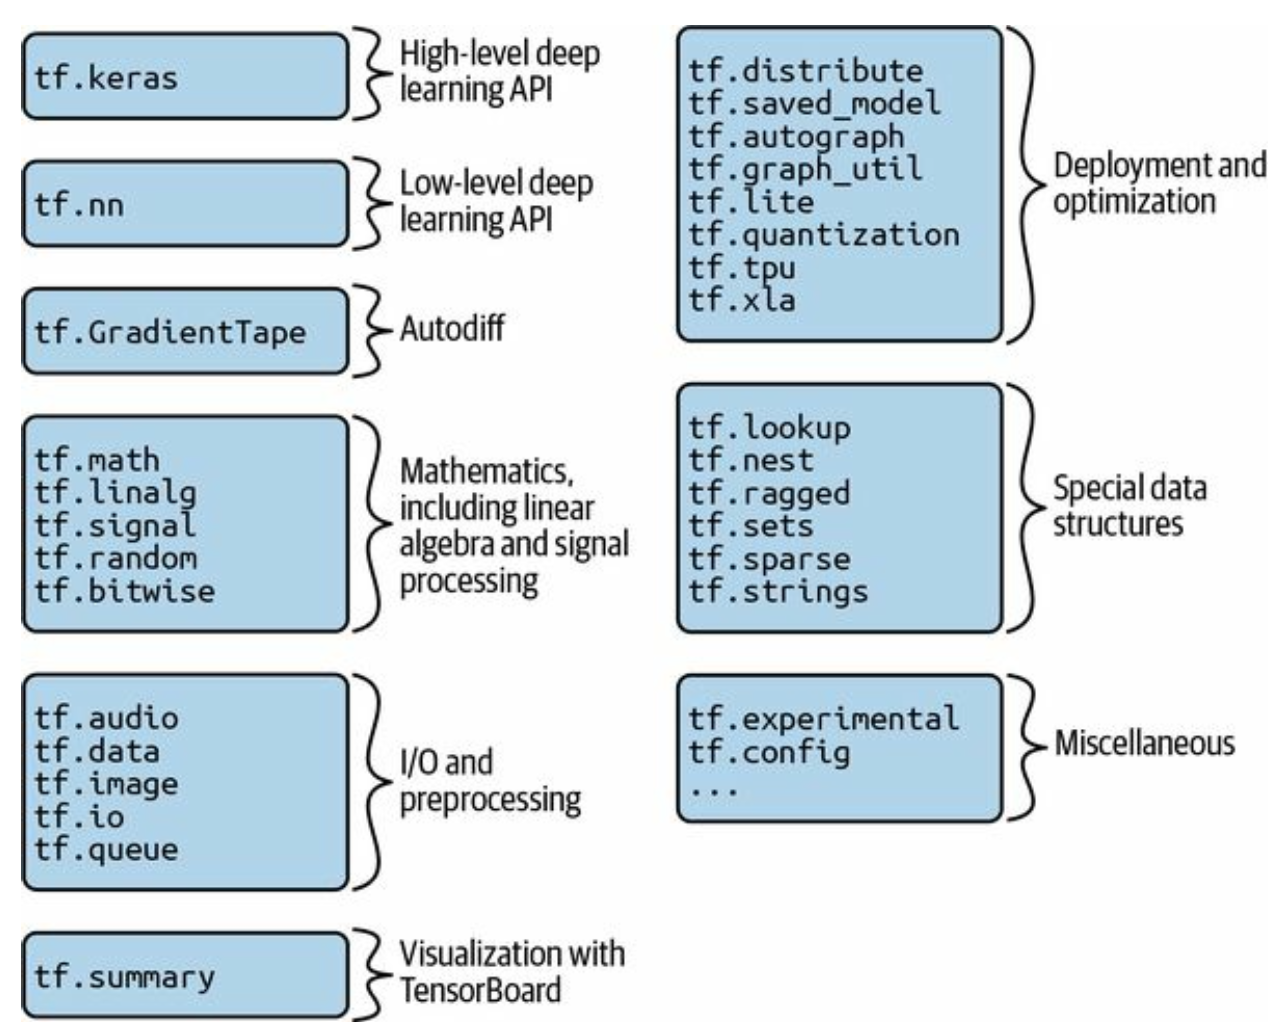

Google’s TensorFlow Hub es una forma de obtener modelos ya entrenados (model garden). También están publicadas arquitecturas

https://paperswithcode.com es una forma de encontrar papers con el código donde aprender

## Tensors and operations

In [7]:
import tensorflow as tf
tensor = tf.constant([[1.,2.,3.], [4.,5.,6.]]) #Tensor para una matriz de 2 columnas x 3 filas
tensor

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

En Numpy el equivalente es ndArray (n dimensions array). Al igual que estos, los tensors tienen un shape y un tipo de dato
El indexing funciona igual que en Numpy

In [8]:
tensor[:,1:] #Toma todos, menos la columna 1

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [11]:
tensor[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

Operaciones

In [12]:
tensor + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [13]:
tf.square(tensor)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [14]:
tf.transpose(tensor)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [15]:
tensor @ tf.transpose(tensor) # Matrix multiplication

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [17]:
scalar = tf.constant(50)

### Operaciones
- tf.add()
- tf.multiply()
- tf.square()
- tf.exp()
- tf.sqrt()
- tf.reshape()
- tf.squeeze()
- tf.tile()
- tf.reduce_mean()
- tf.reduce_sum()
- tf.reduce_max()
- tf.math.log()

in TensorFlow you must write
tf.transpose(t); you cannot just write t.T like in NumPy. The reason is that the
tf.transpose() function does not do exactly the same thing as NumPy’s T
attribute: in TensorFlow, a new tensor is created with its own copy of the
transposed data, while in NumPy, t.T is just a transposed view on the same
data. Similarly, the tf.reduce_sum() operation is named this way because its
GPU kernel (i.e., GPU implementation) uses a reduce algorithm that does not
guarantee the order in which the elements are added: because 32-bit floats
have limited precision, the result may change ever so slightly every time you
call this operation. The same is true of tf.reduce_mean() (but of course tf.reduce_max() is deterministic).

#### Tensor and Numpy
Tensors play nice with NumPy: you can create a tensor from a NumPy array, and vice versa. You can even apply TensorFlow operations to NumPy arrays and NumPy operations to tensors

In [18]:
import numpy as np

array = np.array([2.,4.,5.])
tf.constant(array)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [20]:
tensor.numpy()


array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [22]:
tf.square(array)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [25]:
np.square(tensor)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Notice that NumPy uses 64-bit precision by default, while TensorFlow uses 32-bit. This is because 32-bit precision is generally more than enough for neural networks, plus it runs faster and uses less RAM. So when you create a tensor from a NumPy array, make sure to set dtype=tf.float32.

In [ ]:
Por que alguien usaria esto cruzado? Si después cambian las versiones y no sabés si las van a seguir adaptando

#### Conversiones de tipo
Las conversiones de tipo son costosas computacionalmente por eso Tensor Flow nunca las ejecuta automáticamente y 
levanta una excepción en caso de que se quiera realizar una operación cruzada. Por ejemplo: No se puede sumar
un tensor que usa float32 a uno que usa float64, o float e int

In [27]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

In [28]:
>>> tf.constant(2.) + tf.constant(40., dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

Para realizar una conversión se usa tf.cast()

In [30]:
tensor2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(tensor2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

#### Variables
Los tensores son variables inmutables, no se pueden modificar. Esto significa que no se usan tensores en una Neural Network, pues necesitás modificarlos para entrenar el modelo. Lo que se usa es tf.Variable

In [40]:
variable = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
variable

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

Un variable actúa casi igual que un Tensor, las mismas operaciones, interacción con Numpy y mismas características de tipos. Puede ser modificado usando el método assign() o add_assing(), assign_sub() que incrementan o decrementan por el valor dado. 

Se puede modificar porciones del tensor usando el slice de celda o porción con assign() o usando scatter_update() o scatter_nd_update()

In [41]:
variable.assign(2 * variable)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [42]:
variable[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [43]:
variable[:,2].assign([0.,1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [45]:
variable.scatter_nd_update(indices=[[0,0],[1,2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

Asignar directamente como si fuese un array convencional resultará en un error

In [46]:
variable[1]= [7., 8., 9.]

TypeError: 'ResourceVariable' object does not support item assignment

En general nunca se instancias variables, sino que keras lo hace automáticamente con un método add_weight(), en general los que actualizan los parámetros son los optimizadores, por lo cual, no se hace manualmente

### Otros tipos de datos

#### Sparse tensors (tf.SparseTensor)
Representa eficientemente Tensors que contienen mayoritariamente ceros

#### Tensor arrays (tf.TensorArray)
Son listas de tensores, tienen un largo fijo por default pero se pueden hacer extensibles. Todos los tensores deben tener el mismo tipo de datos

#### Ragged tensors (tf.RaggedTensor)
Representa una lista de tensores, del mismo rango y tipo de dato pero con tamaños variables. Las dimensiones sobre las cuales el tensor varia se llaman Ragged dimensions. El paquete tf.ragged tiene las operaciones para esta estructura

#### String tensors
Son tensores regulares del tipo tf.string. Tienen la particularidad de tener que ser byte strings, aunque se los pases como string unicode comunes de python te los convierte a utf-8. Una forma de hacer bypass a esto es trabajar con int32 donde cada número representa un unicode. tf.string es atomico, por lo que su largo no aparece en la forma del tensor. Si se convierte a un tensor unicode (int32) el largo aparece

#### Sets
Son representados como tensores regulares o sparse. tf.constant([[1, 2], [3, 4]]) representa los dos conjuntos {1,2} y {3,4}. Más generalmente, cada conjunto esta representado por un vector en el último eje del tensor. Se pueden manipular con operaciones del paquete tf.sets

#### Queues
Guarda un tensor en cada paso. Hay varios tipo, FIFO, Priority, RandomShuffleQueue y batch items of different shapes by padding
(PaddingFIFOQueue). Estas clases están en el paquete tf.queue package.